In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [75]:
plt.rc('font', size=12)

# D3RLPY-PAP5

In [76]:
d3rlpy_pap5_core_datasets = [
    "D3RLPY-PAP5-P0-3",
    "D3RLPY-PAP5-P1-4",
    "D3RLPY-PAP5-P0_100000",
    "D3RLPY-PAP5-P4_100000",
    "D3RLPY-PAP5_100000"
]

d3rlpy_pap5_training_datasets = [
    "D3RLPY-PAP5-P0_25000",
    "D3RLPY-PAP5-P1_25000",
    "D3RLPY-PAP5-P2_25000",
    "D3RLPY-PAP5-P3_25000",
    "D3RLPY-PAP5-P4_25000",
]

d3rlpy_pap5_pol_datasets = [
    "D3RLPY-PAP5-P0_100000",
    "D3RLPY-PAP5-P1_100000",
    "D3RLPY-PAP5-P2_100000",
    "D3RLPY-PAP5-P3_100000",
    "D3RLPY-PAP5-P4_100000",
]

d3rlpy_pap5_datasets = [
    "D3RLPY-PAP5",
    "D3RLPY-PAP5-P0-3",
    "D3RLPY-PAP5-P1-4",
    "D3RLPY-PAP5_100000",
    "D3RLPY-PAP5-P0_25000",
    "D3RLPY-PAP5-P1_25000",
    "D3RLPY-PAP5-P2_25000",
    "D3RLPY-PAP5-P3_25000",
    "D3RLPY-PAP5-P4_25000",
    "D3RLPY-PAP5-P0_100000",
    "D3RLPY-PAP5-P1_100000",
    "D3RLPY-PAP5-P2_100000",
    "D3RLPY-PAP5-P3_100000",
    "D3RLPY-PAP5-P4_100000",
]

d3rlpy_pap5_experiments = ["MP100", "MP101", "MP102", "MP103", "MP104", "MP105", "MP106", "MP107", "MP108", "MP109", "MP110", "MP111", "MP124", "MP125", "MP126", "MP134", "MP135", "MP136", "MP137", "MP138", "MP139"]#, "MP130", "MP131", "MP132"]

In [77]:
d3rlpy_mp1_core_datasets = [
    "D3RLPY-MP1-P0-3",
    "D3RLPY-MP1-P1-4",
    "D3RLPY-MP1-P0_100000",
    "D3RLPY-MP1-P4_100000",
    "D3RLPY-MP1_100000"
]

d3rlpy_mp1_training_datasets = [
    "D3RLPY-MP1-P0_25000",
    "D3RLPY-MP1-P1_25000",
    "D3RLPY-MP1-P2_25000",
    "D3RLPY-MP1-P3_25000",
    "D3RLPY-MP1-P4_25000",
]

d3rlpy_mp1_pol_datasets = [
    "D3RLPY-MP1-P0_100000",
    "D3RLPY-MP1-P1_100000",
    "D3RLPY-MP1-P2_100000",
    "D3RLPY-MP1-P3_100000",
    "D3RLPY-MP1-P4_100000",
]

d3rlpy_mp1_datasets = [
    "D3RLPY-MP1",
    "D3RLPY-MP1-P0-3",
    "D3RLPY-MP1-P1-4",
    "D3RLPY-MP1_100000",
    "D3RLPY-MP1-P0_25000",
    "D3RLPY-MP1-P1_25000",
    "D3RLPY-MP1-P2_25000",
    "D3RLPY-MP1-P3_25000",
    "D3RLPY-MP1-P4_25000",
    "D3RLPY-MP1-P0_100000",
    "D3RLPY-MP1-P1_100000",
    "D3RLPY-MP1-P2_100000",
    "D3RLPY-MP1-P3_100000",
    "D3RLPY-MP1-P4_100000",
]

In [78]:
random_datasets = [
    "RAND-1",
    "RAND-2",
    "RAND-3",
    "RAND-4",
    "RAND-5",
    "RAND-6",
    "RAND-7",
    "RAND-8",
    "RAND-9",
    "RAND-10",
]

In [79]:
d3rlpy_pap5_scores_df = get_scores_df(d3rlpy_pap5_experiments, set(d3rlpy_pap5_datasets).union(set(d3rlpy_mp1_datasets).union(set(random_datasets))))
# d3rlpy_pap5_scores_df

In [80]:
d3rlpy_pap5_scores_groups = (
    d3rlpy_pap5_scores_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
d3rlpy_pap5_scores_avgs_df = d3rlpy_pap5_scores_groups.mean().reset_index()

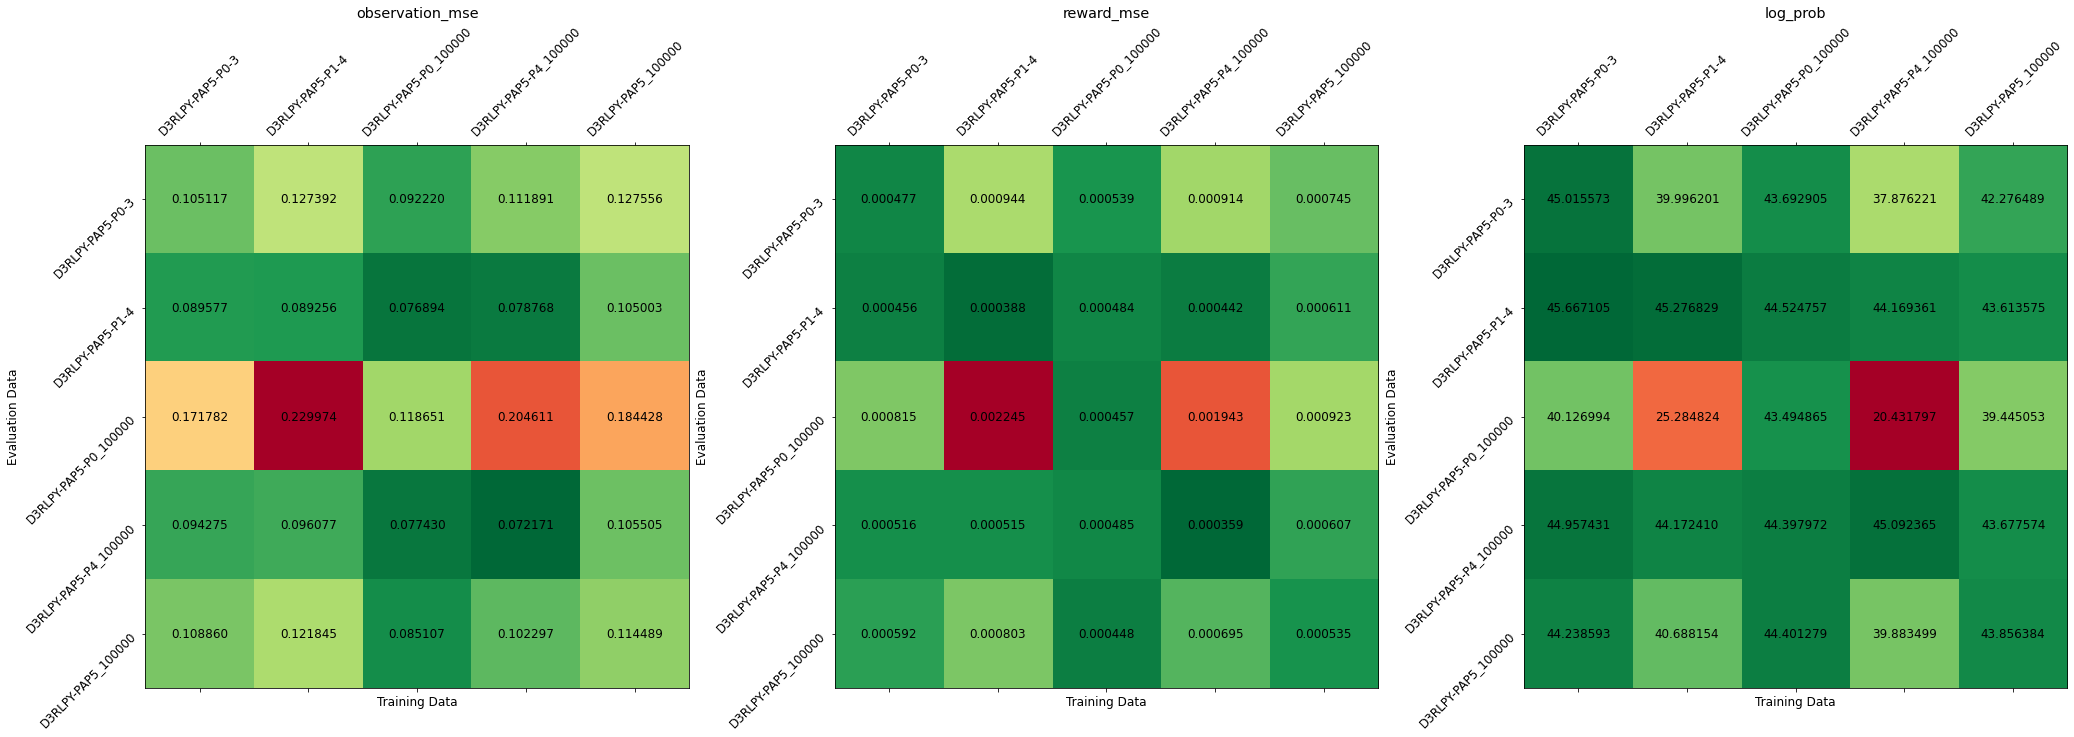

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(35,10))

training_datasets = d3rlpy_pap5_core_datasets
evaluation_datasets = d3rlpy_pap5_core_datasets
mask = (
    (d3rlpy_pap5_scores_avgs_df['training_dataset'].isin(training_datasets)) &
    (d3rlpy_pap5_scores_avgs_df['rex'] == False) &
    (d3rlpy_pap5_scores_avgs_df['rex_beta'] == 0.) &
    (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets))
)

for i, metric in enumerate(['observation_mse', 'reward_mse', 'log_prob']):
    metric_df = d3rlpy_pap5_scores_avgs_df.loc[mask].pivot_table(columns='training_dataset', index='evaluation_dataset', values=metric).loc[evaluation_datasets][training_datasets]
    ax[i].matshow(metric_df, cmap='RdYlGn' if 'log_prob' in metric else 'RdYlGn_r')
    for (x, y), value in np.ndenumerate(metric_df):
        ax[i].text(y, x, f"{value:.6f}", va="center", ha="center", c='k')
    ax[i].set_title(metric)
    ax[i].set_xlabel('Training Data')
    ax[i].set_ylabel('Evaluation Data')
    ax[i].set_xticks(np.arange(0,5))
    ax[i].set_yticks(np.arange(0,5))
    ax[i].set_xticklabels(metric_df.columns.values, rotation=45)
    ax[i].set_yticklabels(metric_df.index.values, rotation=45)
pass

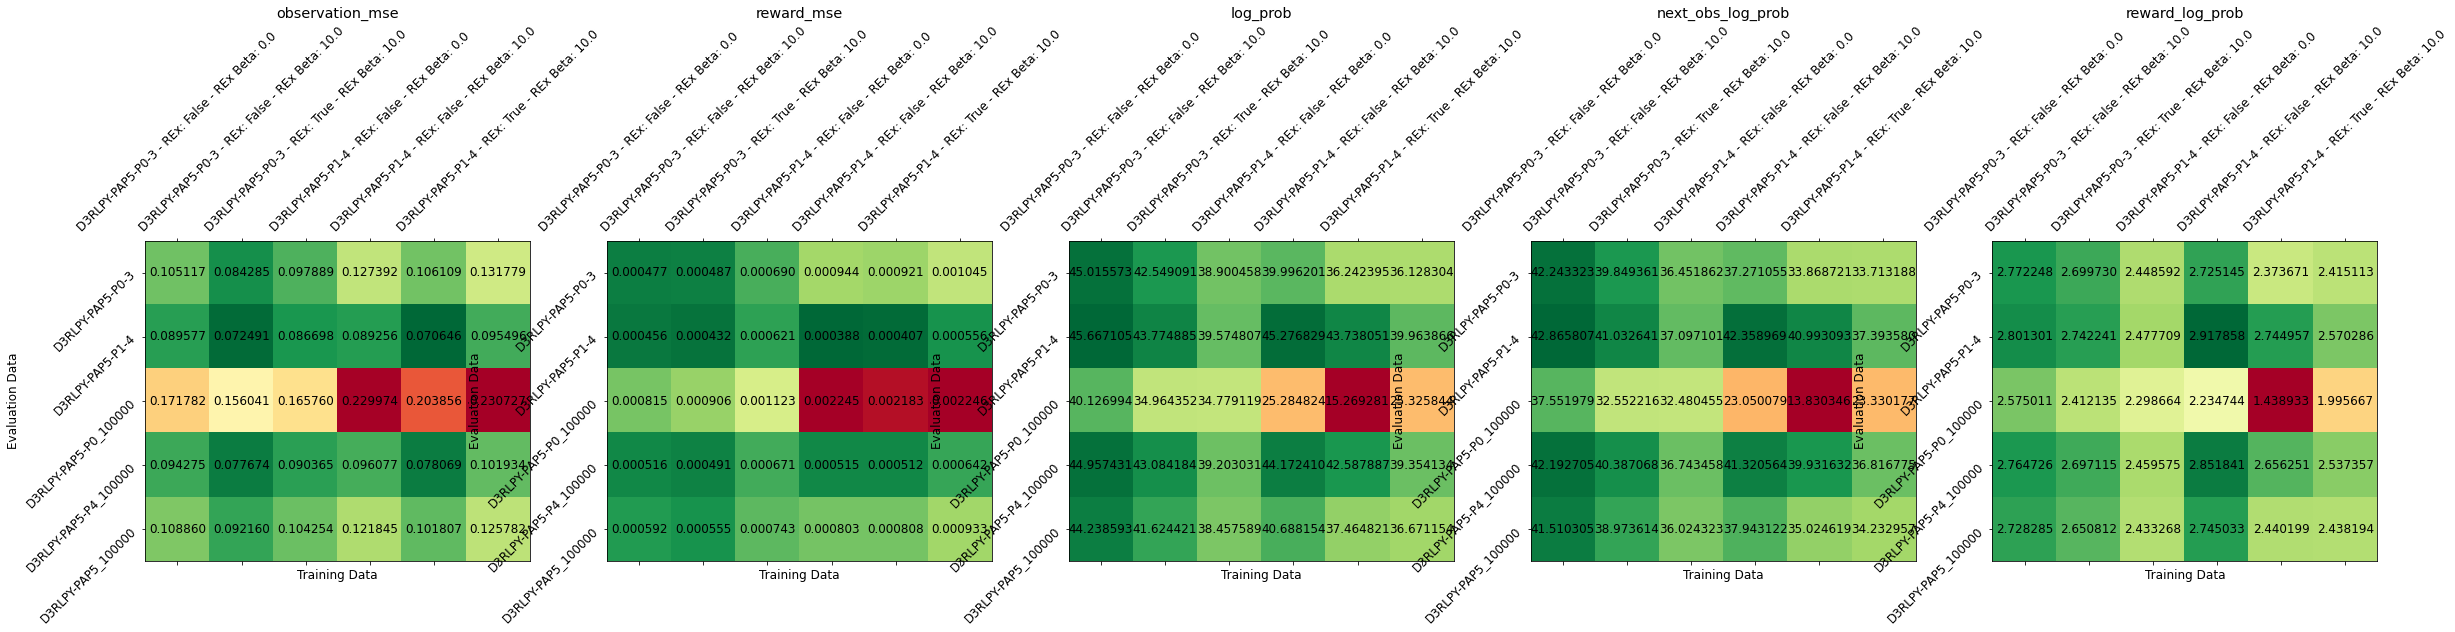

In [82]:
fig, ax = plt.subplots(1, 5, figsize=(40,10))

training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_core_datasets
mask = (
    (d3rlpy_pap5_scores_avgs_df['training_dataset'].isin(training_datasets)) &
    (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets))
)

for i, metric in enumerate(['observation_mse', 'reward_mse', 'log_prob', 'next_obs_log_prob', 'reward_log_prob']):
    metric_df = d3rlpy_pap5_scores_avgs_df.loc[mask].pivot_table(columns=['training_dataset', 'rex', 'rex_beta'], index='evaluation_dataset', values=metric).loc[evaluation_datasets][training_datasets]
    ax[i].matshow(metric_df, cmap='RdYlGn' if 'log_prob' in metric else 'RdYlGn_r')
    for (x, y), value in np.ndenumerate(metric_df):
        ax[i].text(y, x, f"{value:.6f}", va="center", ha="center", c='k')
    ax[i].set_title(metric)
    ax[i].set_xlabel('Training Data')
    ax[i].set_ylabel('Evaluation Data')
    ax[i].set_xticks(np.arange(0,6))
    ax[i].set_yticks(np.arange(0,5))
    ax[i].set_xticklabels([f'{i[0]} - REx: {i[1]} - REx Beta: {i[2]}' for i in metric_df.columns], rotation=45)
    ax[i].set_yticklabels(metric_df.index.values, rotation=45)
pass

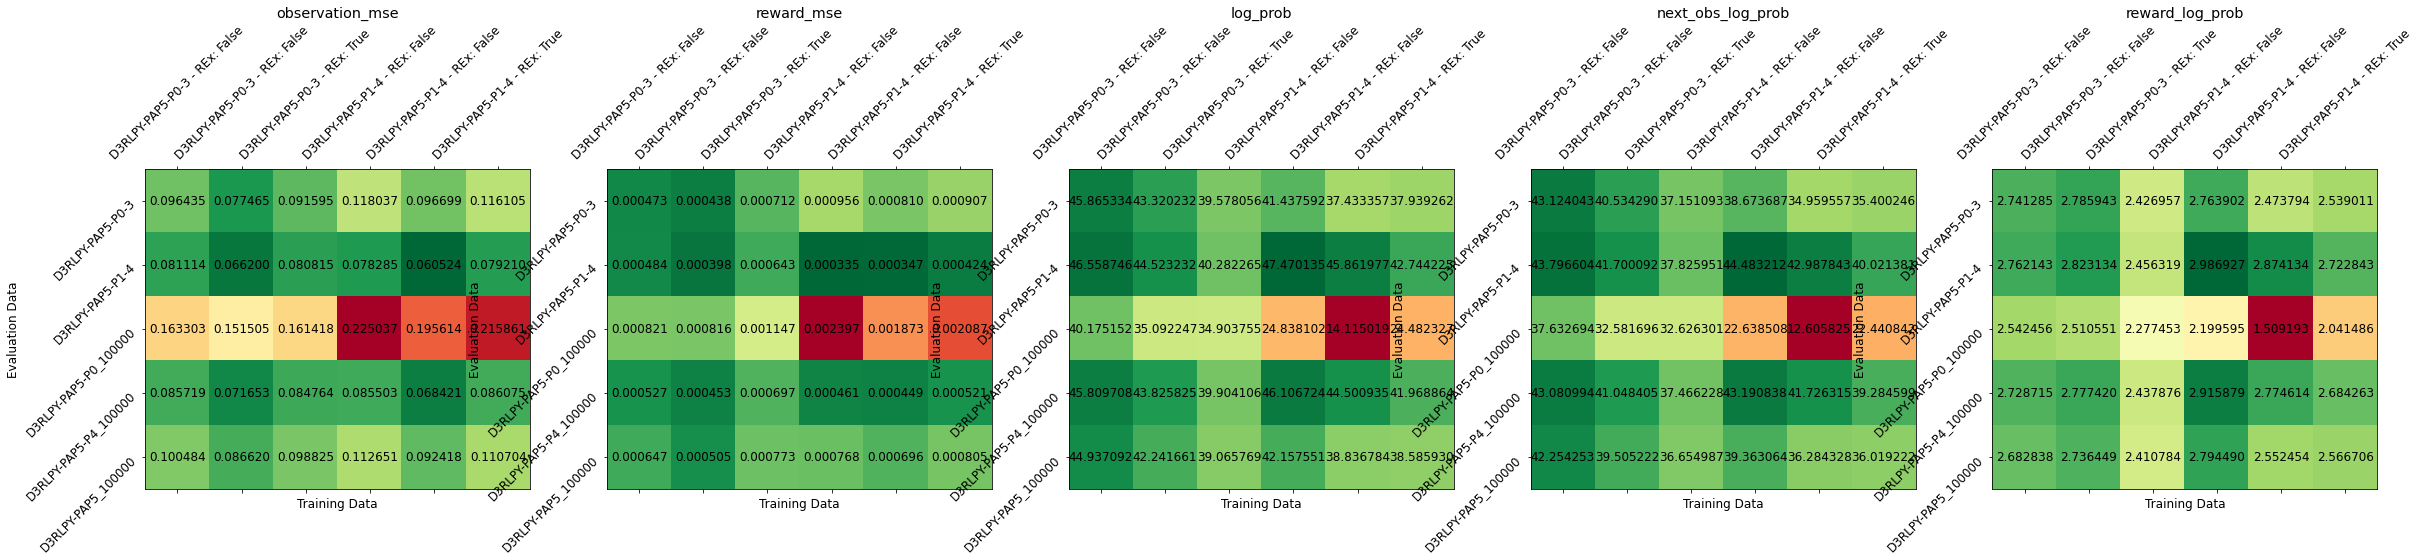

In [83]:
fig, ax = plt.subplots(1, 5, figsize=(40,10))

training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_core_datasets
mask = (
    (d3rlpy_pap5_scores_df['training_dataset'].isin(training_datasets)) &
    (d3rlpy_pap5_scores_df['seed'] == 1443) &
    (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets))
)

for i, metric in enumerate(['observation_mse', 'reward_mse', 'log_prob', 'next_obs_log_prob', 'reward_log_prob']):
    metric_df = d3rlpy_pap5_scores_df.loc[mask].pivot_table(columns=['training_dataset', 'rex', 'rex_beta'], index='evaluation_dataset', values=metric).loc[evaluation_datasets][training_datasets]
    ax[i].matshow(metric_df, cmap='RdYlGn' if 'log_prob' in metric else 'RdYlGn_r')
    for (x, y), value in np.ndenumerate(metric_df):
        ax[i].text(y, x, f"{value:.6f}", va="center", ha="center", c='k')
    ax[i].set_title(metric)
    ax[i].set_xlabel('Training Data')
    ax[i].set_ylabel('Evaluation Data')
    ax[i].set_xticks(np.arange(0,6))
    ax[i].set_yticks(np.arange(0,5))
    ax[i].set_xticklabels([f'{i[0]} - REx: {i[1]}' for i in metric_df.columns], rotation=45)
    ax[i].set_yticklabels(metric_df.index.values, rotation=45)
pass

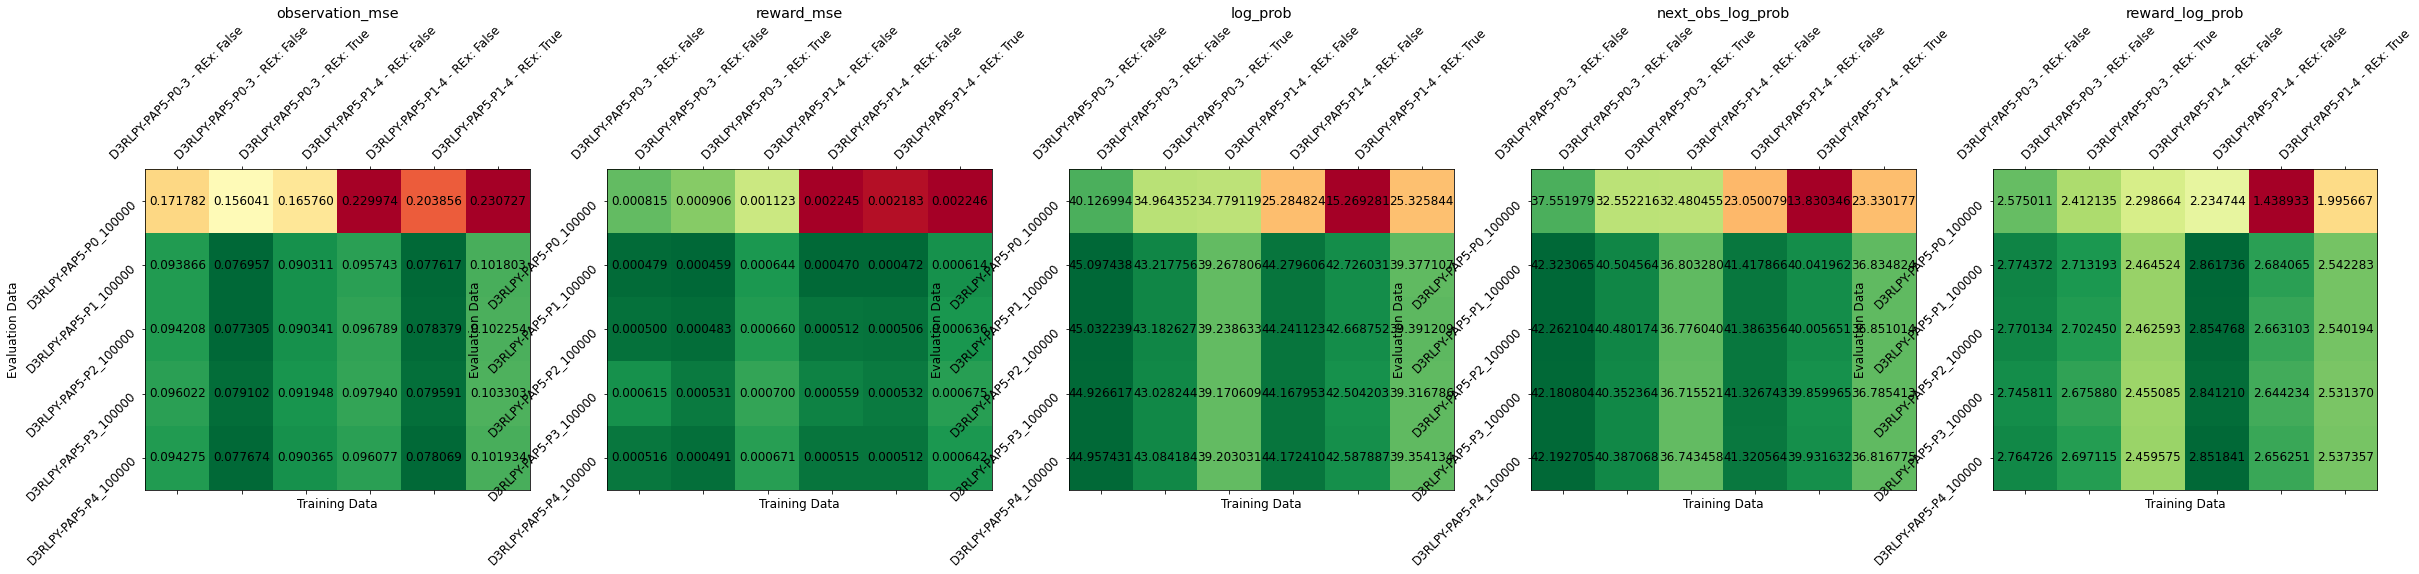

In [84]:
fig, ax = plt.subplots(1, 5, figsize=(40,10))

training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_pol_datasets
mask = (
    (d3rlpy_pap5_scores_avgs_df['training_dataset'].isin(training_datasets)) &
    (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets))
)

for i, metric in enumerate(['observation_mse', 'reward_mse', 'log_prob', 'next_obs_log_prob', 'reward_log_prob']):
    metric_df = d3rlpy_pap5_scores_avgs_df.loc[mask].pivot_table(columns=['training_dataset', 'rex', 'rex_beta'], index='evaluation_dataset', values=metric).loc[evaluation_datasets][training_datasets]
    ax[i].matshow(metric_df, cmap='RdYlGn' if 'log_prob' in metric else 'RdYlGn_r')
    for (x, y), value in np.ndenumerate(metric_df):
        ax[i].text(y, x, f"{value:.6f}", va="center", ha="center", c='k')
    ax[i].set_title(metric)
    ax[i].set_xlabel('Training Data')
    ax[i].set_ylabel('Evaluation Data')
    ax[i].set_xticks(np.arange(0,6))
    ax[i].set_yticks(np.arange(0,5))
    ax[i].set_xticklabels([f'{i[0]} - REx: {i[1]}' for i in metric_df.columns], rotation=45)
    ax[i].set_yticklabels(metric_df.index.values, rotation=45)
pass

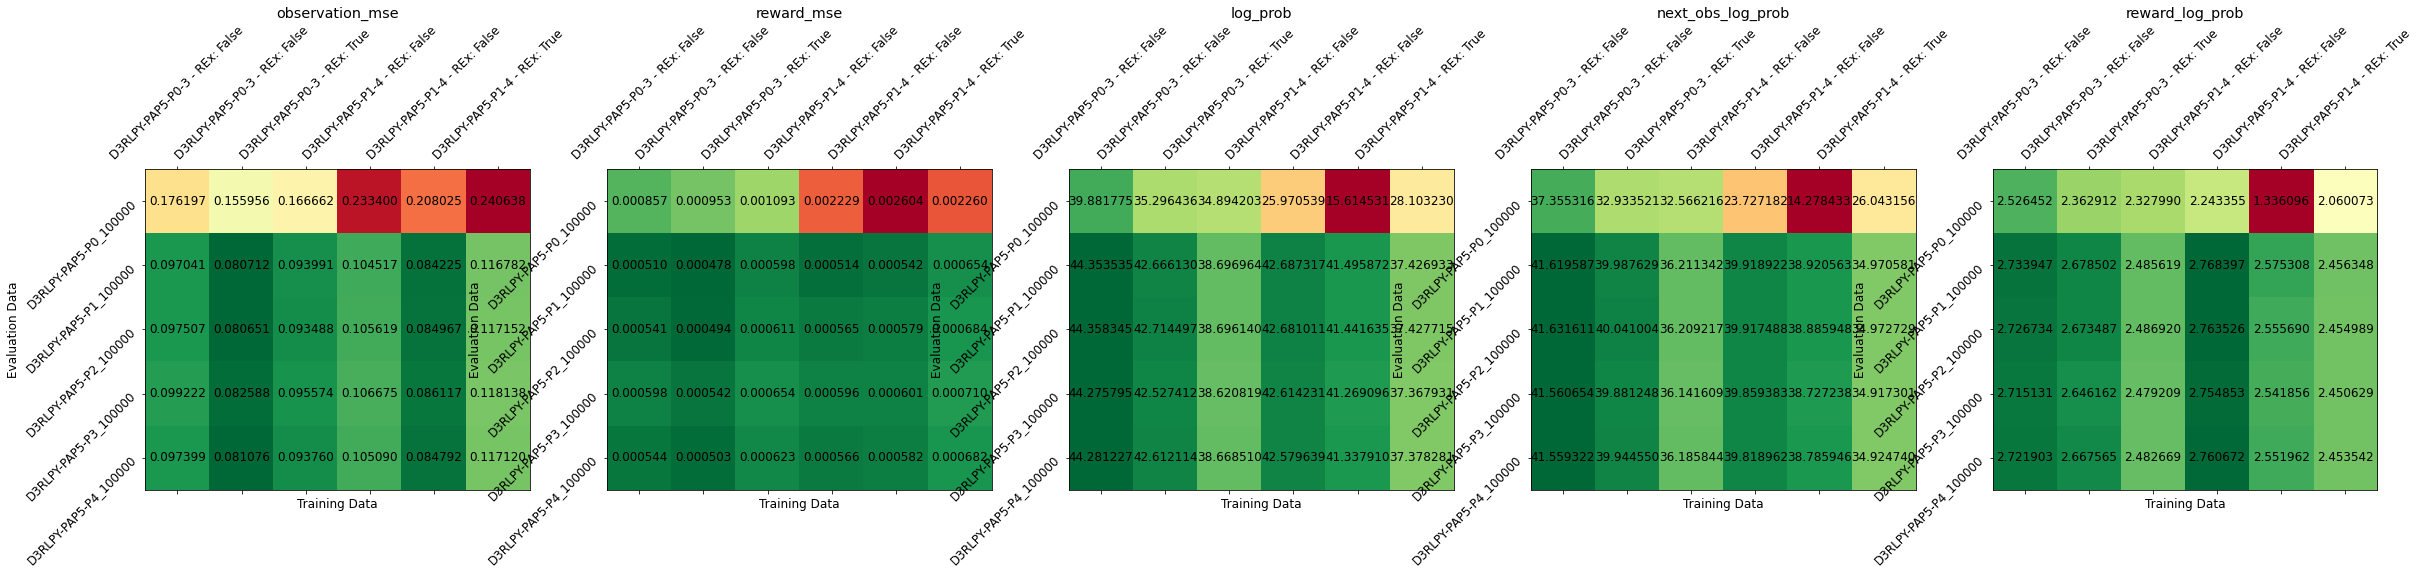

In [85]:
fig, ax = plt.subplots(1, 5, figsize=(40,10))

training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_pol_datasets
mask = (
    (d3rlpy_pap5_scores_df['training_dataset'].isin(training_datasets)) &
    (d3rlpy_pap5_scores_df['seed'] == 1234) &
    (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets))
)

for i, metric in enumerate(['observation_mse', 'reward_mse', 'log_prob', 'next_obs_log_prob', 'reward_log_prob']):
    metric_df = d3rlpy_pap5_scores_df.loc[mask].pivot_table(columns=['training_dataset', 'rex', 'rex_beta'], index='evaluation_dataset', values=metric).loc[evaluation_datasets][training_datasets]
    ax[i].matshow(metric_df, cmap='RdYlGn' if 'log_prob' in metric else 'RdYlGn_r')
    for (x, y), value in np.ndenumerate(metric_df):
        ax[i].text(y, x, f"{value:.6f}", va="center", ha="center", c='k')
    ax[i].set_title(metric)
    ax[i].set_xlabel('Training Data')
    ax[i].set_ylabel('Evaluation Data')
    ax[i].set_xticks(np.arange(0,6))
    ax[i].set_yticks(np.arange(0,5))
    ax[i].set_xticklabels([f'{i[0]} - REx: {i[1]}' for i in metric_df.columns], rotation=45)
    ax[i].set_yticklabels(metric_df.index.values, rotation=45)
pass

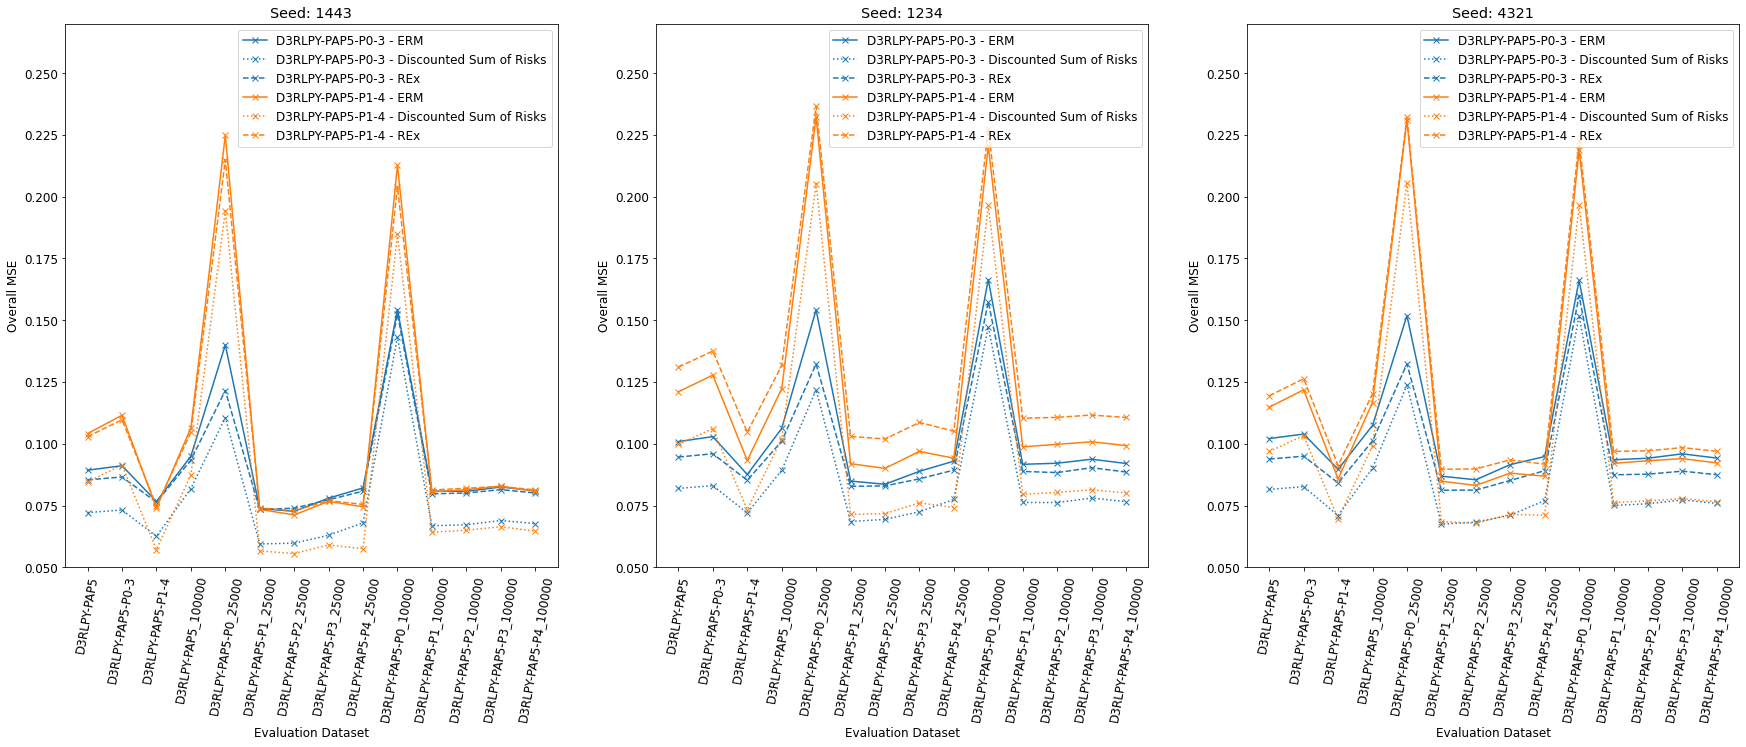

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'overall_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Overall MSE')
            ax[i].set_ylim(0.050, 0.270)
            ax[i].legend()

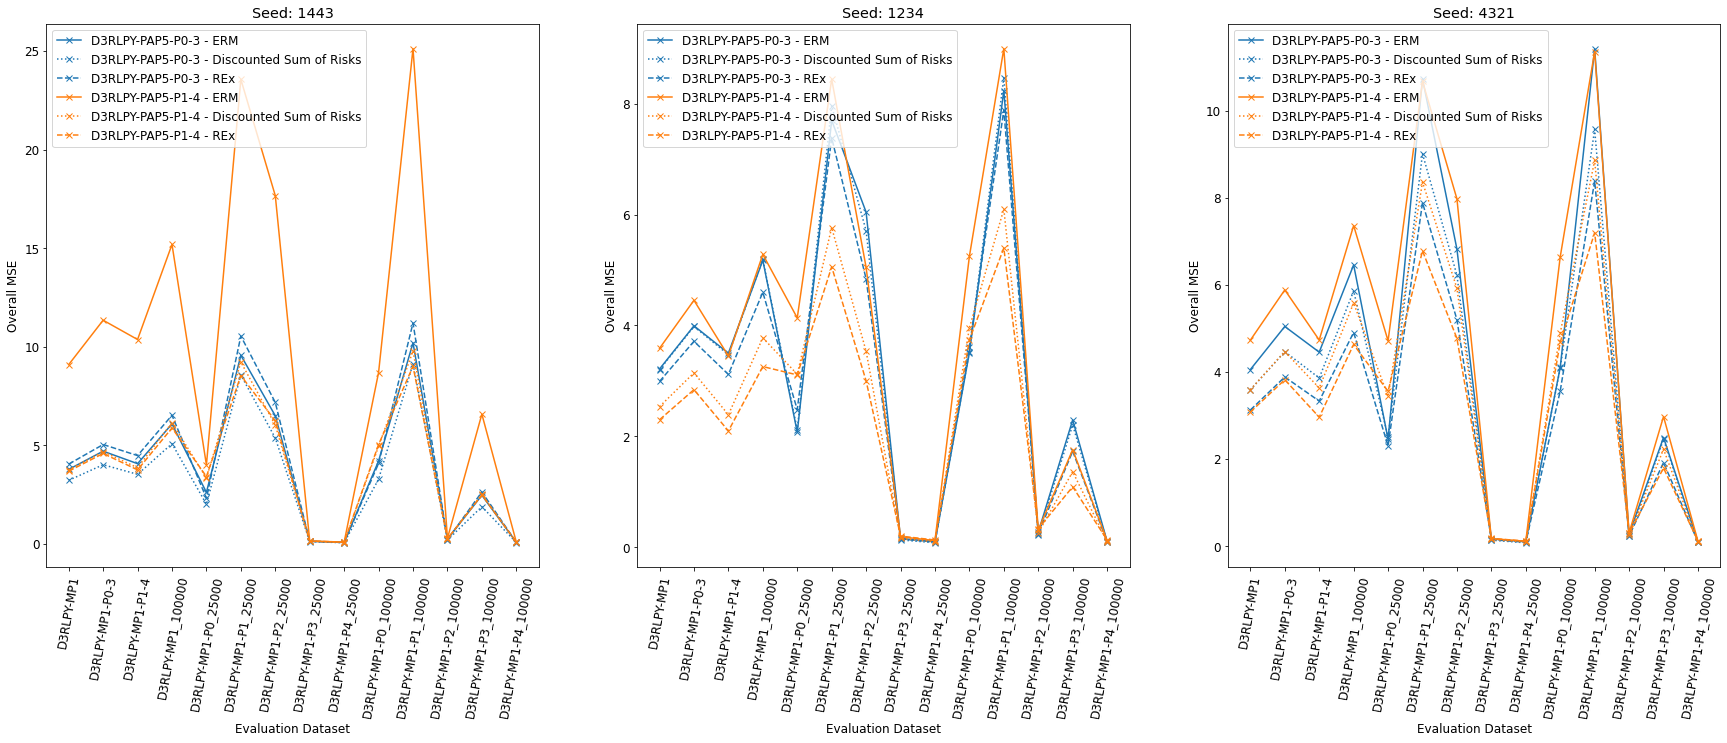

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'overall_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_mp1_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Overall MSE')
            # ax[i].set_ylim(0.050, 0.270)
            ax[i].legend()

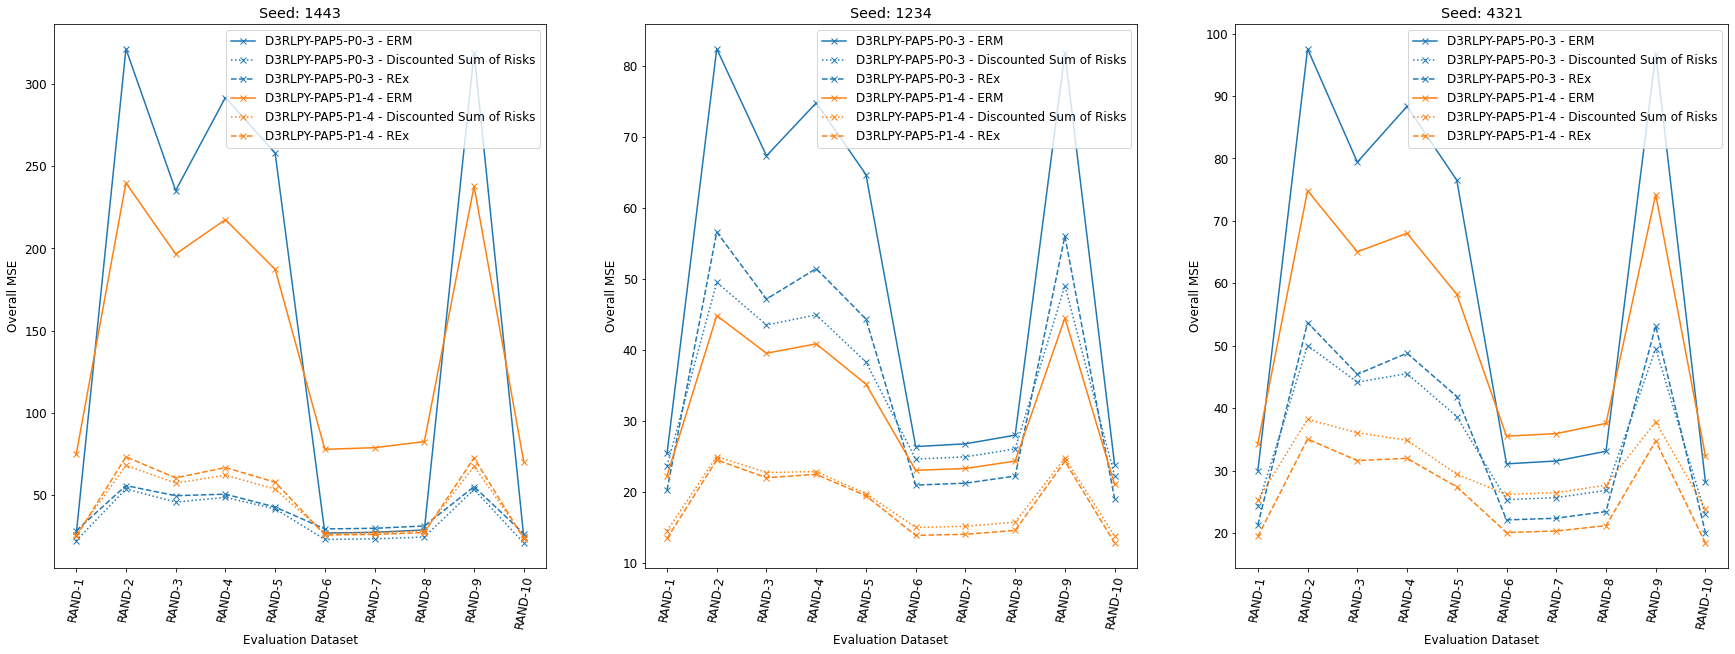

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'overall_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = random_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Overall MSE')
            # ax[i].set_ylim(0.050, 0.270)
            ax[i].legend()

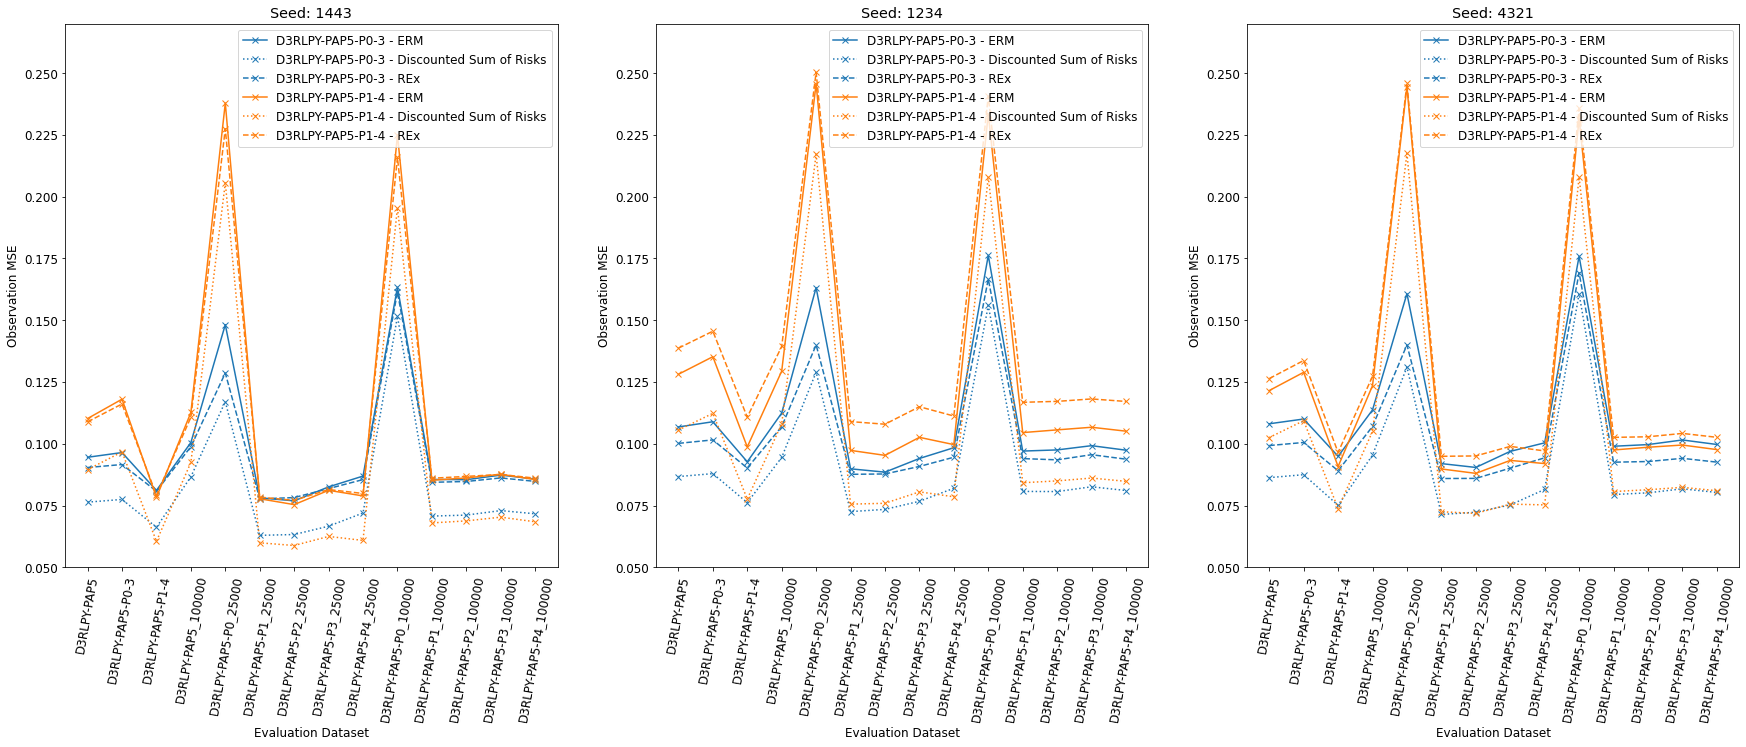

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'observation_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Observation MSE')
            ax[i].set_ylim(0.050, 0.270)
            ax[i].legend()

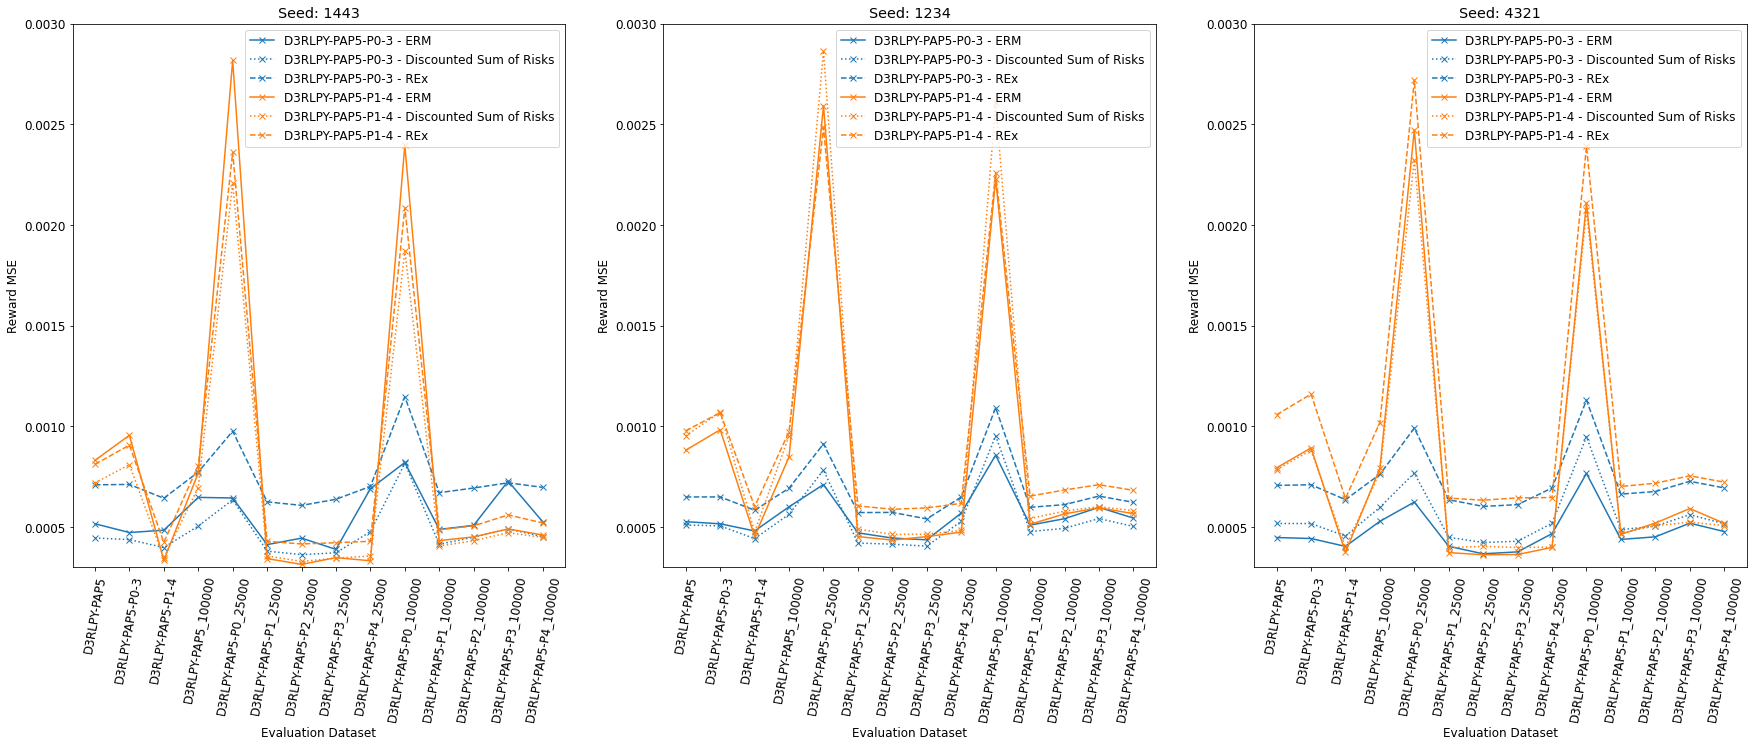

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'reward_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Reward MSE')
            ax[i].set_ylim(0.0003, 0.0030)
            ax[i].legend()

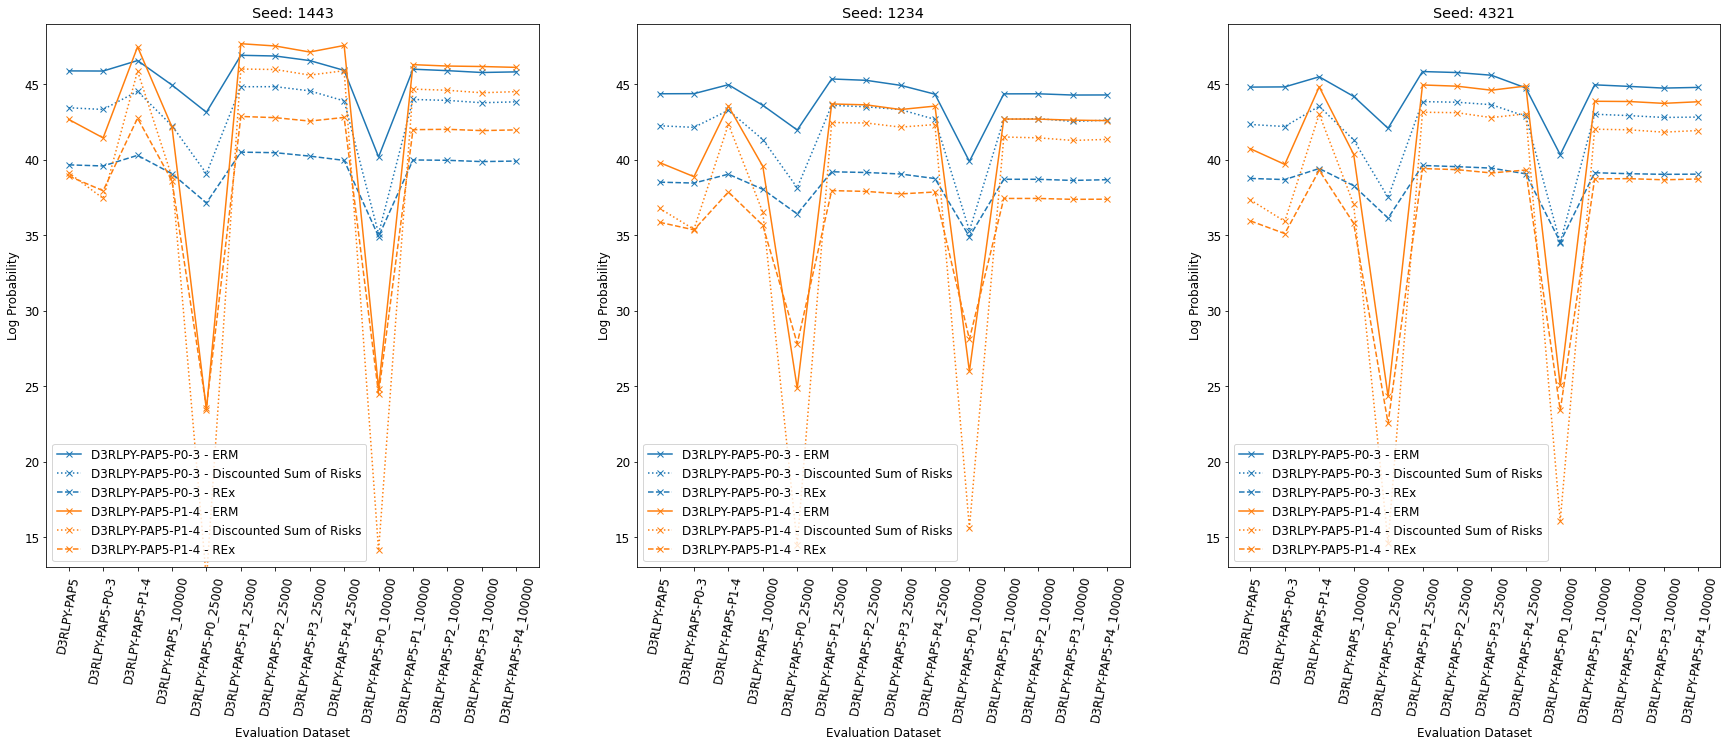

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

d3rlpy_pap5_log_prob_vars = {}

metric = 'log_prob'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_pap5_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Log Probability')
            ax[i].set_ylim(13, 49)
            ax[i].legend()

            d3rlpy_pap5_log_prob_vars[f'{label}-{seed}'] = plot_vals.var()

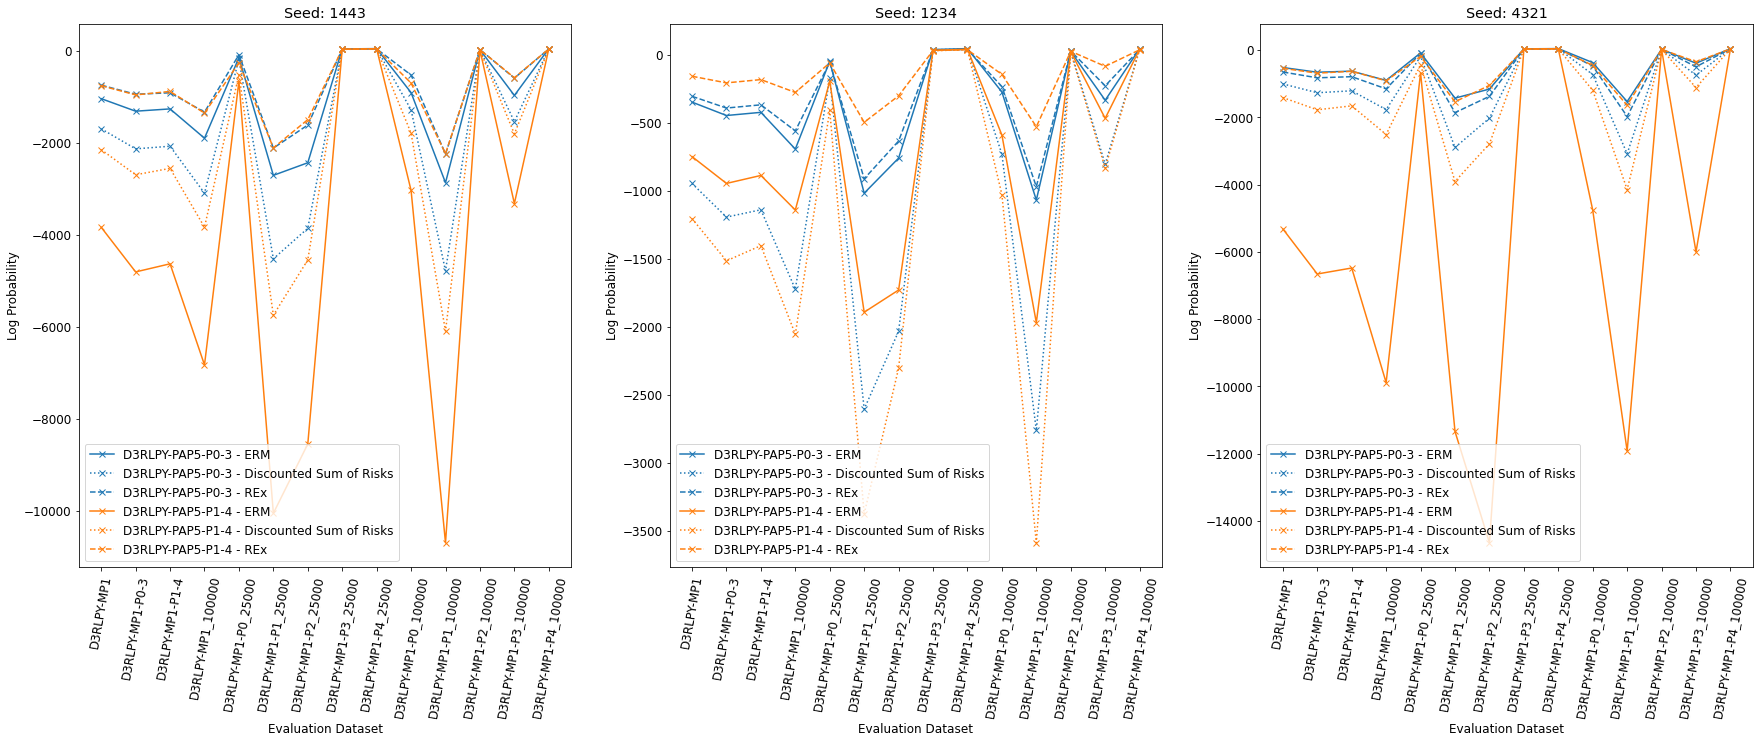

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

d3rlpy_pap5_log_prob_vars = {}

metric = 'log_prob'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = d3rlpy_mp1_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Log Probability')
            # ax[i].set_ylim(13, 49)
            ax[i].legend()

            d3rlpy_pap5_log_prob_vars[f'{label}-{seed}'] = plot_vals.var()

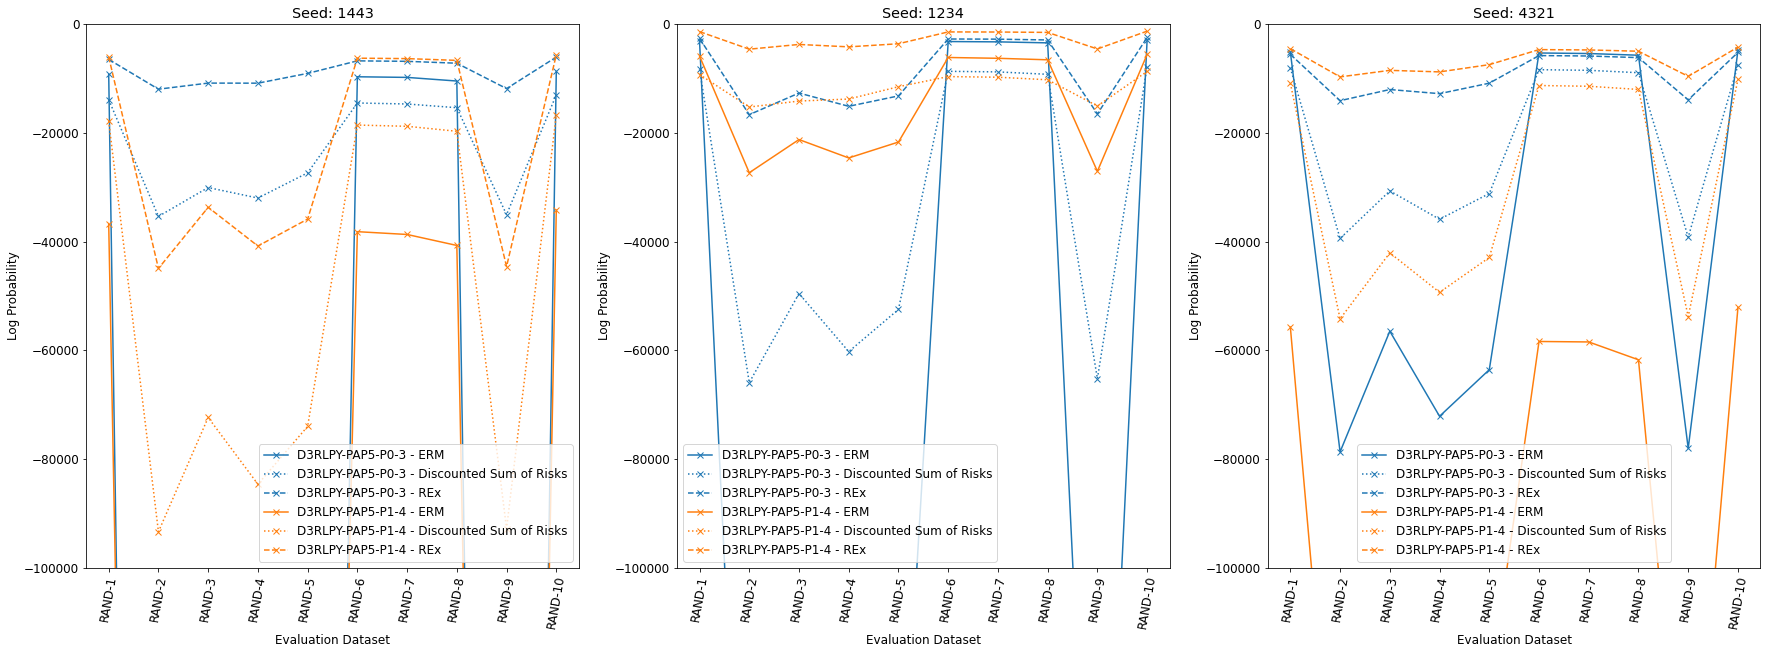

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

d3rlpy_pap5_log_prob_vars = {}

metric = 'log_prob'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = random_datasets
for i, seed in enumerate([1443, 1234, 4321]):
    for j, t_ds in enumerate(training_datasets):
        for k, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
            mask = (
                (d3rlpy_pap5_scores_df['training_dataset'] == t_ds) &
                (d3rlpy_pap5_scores_df['rex'] == rex) &
                (d3rlpy_pap5_scores_df['rex_beta'] == rex_beta) &
                (d3rlpy_pap5_scores_df['seed'] == seed) &
                (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(evaluation_datasets)), ['evaluation_dataset' , metric]
            )

            plot_vals = d3rlpy_pap5_scores_df.loc[mask].set_index('evaluation_dataset').loc[evaluation_datasets][metric]
            label = f'{t_ds} - {labels[k]}'
            p = ax[i].plot(
                evaluation_datasets, plot_vals, label=label, marker='x',
                ls=lss[k],
                c=cols[j]
            )
            ax[i].set_xticks(ax[i].get_xticks(), evaluation_datasets, rotation=80)
            ax[i].set_title(f'Seed: {seed}')
            ax[i].set_xlabel('Evaluation Dataset')
            ax[i].set_ylabel('Log Probability')
            ax[i].set_ylim(-100000, 0)
            ax[i].legend()

            d3rlpy_pap5_log_prob_vars[f'{label}-{seed}'] = plot_vals.var()

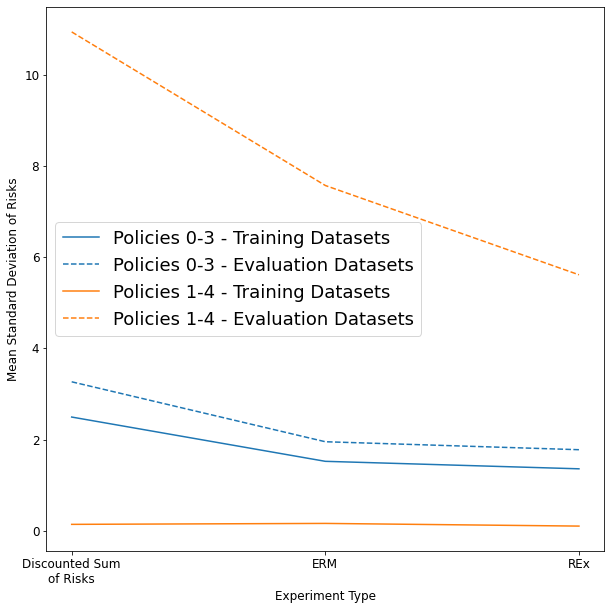

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# plt.rc('font', size=24)

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', '--']
x_labels = ['Discounted Sum\nof Risks', 'ERM', 'REx']

train_eval_datasets = {'D3RLPY-PAP5-P0_25000', 'D3RLPY-PAP5-P1_25000', 'D3RLPY-PAP5-P2_25000', 'D3RLPY-PAP5-P3_25000', 'D3RLPY-PAP5-P4_25000'}
test_eval_datasets = {'D3RLPY-PAP5-P0_100000', 'D3RLPY-PAP5-P1_100000', 'D3RLPY-PAP5-P2_100000', 'D3RLPY-PAP5-P3_100000', 'D3RLPY-PAP5-P4_100000'}

for i, (train_data, exclude, leg_label) in enumerate([('D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P4_25000', 'Policies 0-3'), ('D3RLPY-PAP5-P1-4', 'D3RLPY-PAP5-P0_25000', 'Policies 1-4')]):
    train_mask = (
        (d3rlpy_pap5_scores_df['training_dataset'] == train_data) &
        (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(train_eval_datasets-{exclude}))
    )
    train_plot_vals = (
        d3rlpy_pap5_scores_df[train_mask][['seed', 'rex', 'rex_beta', 'log_prob']].
        groupby(['seed', 'rex', 'rex_beta']).std(ddof=0).
        groupby(['rex', 'rex_beta']).mean().
        loc[[(False, 10.), (False, 0.), (True, 10.)], 'log_prob']
    ).tolist()
    ax.plot(x_labels, train_plot_vals, label=f'{leg_label} - Training Datasets', c=cols[i], ls=lss[0])
    # ax.axhline(train_plot_vals[0], c='gray', ls=':')

    test_mask = (
        (d3rlpy_pap5_scores_df['training_dataset'] == train_data) &
        (d3rlpy_pap5_scores_df['evaluation_dataset'].isin(test_eval_datasets))
    )
    test_plot_vals = (
        d3rlpy_pap5_scores_df[test_mask][['seed', 'rex', 'rex_beta', 'log_prob']].
        groupby(['seed', 'rex', 'rex_beta']).std(ddof=0).
        groupby(['rex', 'rex_beta']).mean().
        loc[[(False, 10.), (False, 0.), (True, 10.)], 'log_prob']
    ).tolist()
    ax.plot(x_labels, test_plot_vals, label=f'{leg_label} - Evaluation Datasets', c=cols[i], ls=lss[1])
    # ax.axhline(test_plot_vals[0], c='gray', ls=':')

ax.set_xlabel('Experiment Type')
ax.set_ylabel('Mean Standard Deviation of Risks')
ax.legend(prop={'size': 18})
# fig.savefig(os.path.join('dogo_plots', f'mean_risk_std_PAP5.png'), pad_inches=0.2, bbox_inches='tight')
pass

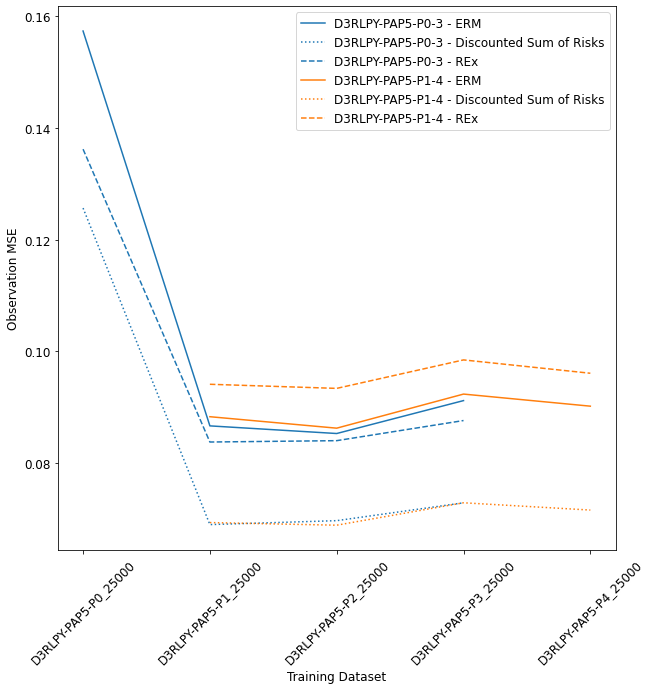

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'observation_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = [
    'D3RLPY-PAP5-P0_25000',
    'D3RLPY-PAP5-P1_25000',
    'D3RLPY-PAP5-P2_25000',
    'D3RLPY-PAP5-P3_25000',
    'D3RLPY-PAP5-P4_25000',
]
for i, t_ds in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), 'observation_mse'
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds} - {labels[j]}'
        if 'P0' in t_ds:
            p = ax.plot(evaluation_datasets[:4], plot_mean[:4], label=label, ls=lss[j], c=cols[i])
        else:
            p = ax.plot(evaluation_datasets[1:], plot_mean[1:], label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=45)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Observation MSE')
ax.legend()

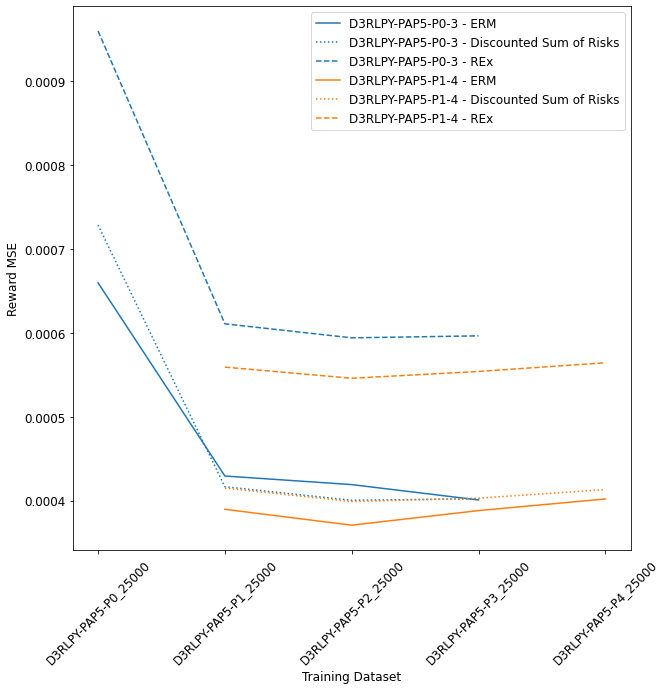

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'reward_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = [
    'D3RLPY-PAP5-P0_25000',
    'D3RLPY-PAP5-P1_25000',
    'D3RLPY-PAP5-P2_25000',
    'D3RLPY-PAP5-P3_25000',
    'D3RLPY-PAP5-P4_25000',
]
for i, t_ds in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), metric
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds} - {labels[j]}'
        if 'P0' in t_ds:
            p = ax.plot(evaluation_datasets[:4], plot_mean[:4], label=label, ls=lss[j], c=cols[i])
        else:
            p = ax.plot(evaluation_datasets[1:], plot_mean[1:], label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=45)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Reward MSE')
ax.legend()

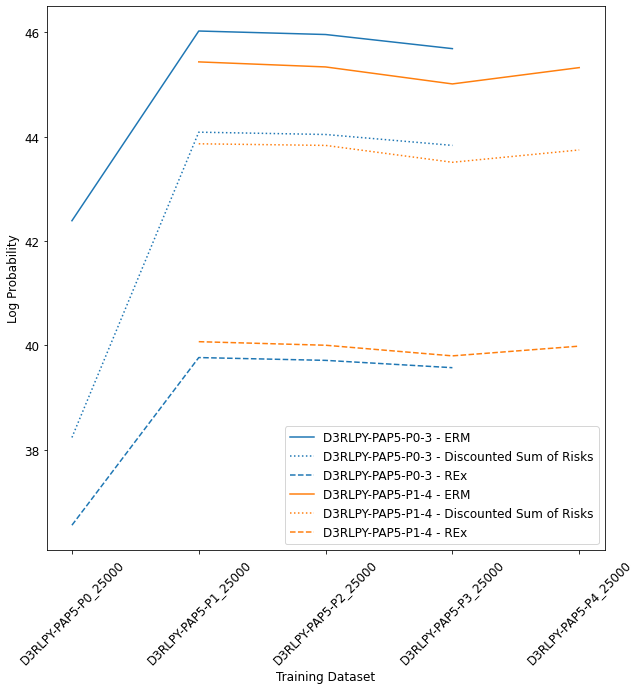

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'log_prob'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = [
    'D3RLPY-PAP5-P0_25000',
    'D3RLPY-PAP5-P1_25000',
    'D3RLPY-PAP5-P2_25000',
    'D3RLPY-PAP5-P3_25000',
    'D3RLPY-PAP5-P4_25000',
]
for i, t_ds in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), metric
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds} - {labels[j]}'
        if 'P0' in t_ds:
            p = ax.plot(evaluation_datasets[:4], plot_mean[:4], label=label, ls=lss[j], c=cols[i])
        else:
            p = ax.plot(evaluation_datasets[1:], plot_mean[1:], label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=45)
ax.set_xlabel('Training Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

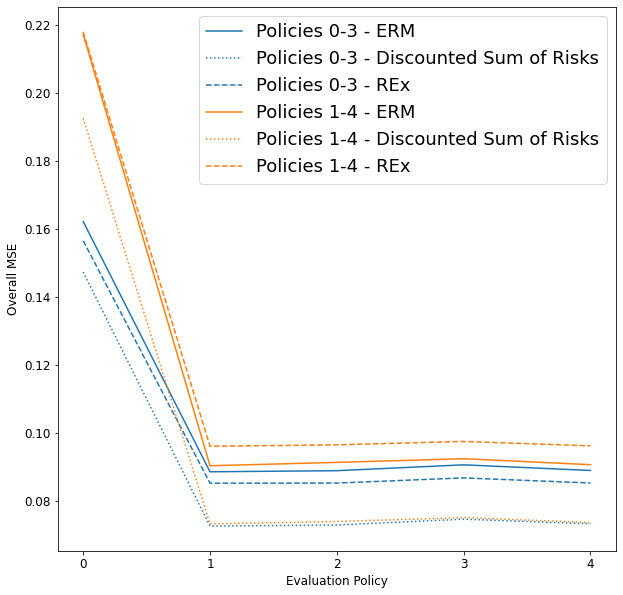

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
# plt.rc('font', size=24)

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'overall_mse'
training_datasets = [('D3RLPY-PAP5-P0-3', 'Policies 0-3'), ('D3RLPY-PAP5-P1-4', 'Policies 1-4')]
evaluation_datasets = [
    'D3RLPY-PAP5-P0_100000',
    'D3RLPY-PAP5-P1_100000',
    'D3RLPY-PAP5-P2_100000',
    'D3RLPY-PAP5-P3_100000',
    'D3RLPY-PAP5-P4_100000',
]
for i, (t_ds, t_ds_label) in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), metric
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds_label} - {labels[j]}'
        p = ax.plot(evaluation_datasets, plot_mean, label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), np.arange(5))
ax.set_xlabel('Evaluation Policy')
ax.set_ylabel('Overall MSE')
ax.legend(prop={'size': 18})
# fig.savefig(os.path.join('dogo_plots', f'overall_mse_PAP5.png'), pad_inches=0.2, bbox_inches='tight')
pass

In [99]:
mask = (
    (d3rlpy_pap5_scores_avgs_df['training_dataset'] == 'D3RLPY-PAP5-P0-3') &
    (d3rlpy_pap5_scores_avgs_df['rex'] == False) &
    (d3rlpy_pap5_scores_avgs_df['rex_beta'] == 0.) &
    (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets))
)
d3rlpy_pap5_scores_avgs_df.loc[mask]

training_dataset    rex  rex_beta     evaluation_dataset         seed  \
16  D3RLPY-PAP5-P0-3  False       0.0  D3RLPY-PAP5-P0_100000  2332.666667   
19  D3RLPY-PAP5-P0-3  False       0.0  D3RLPY-PAP5-P1_100000  2332.666667   
21  D3RLPY-PAP5-P0-3  False       0.0  D3RLPY-PAP5-P2_100000  2332.666667   
23  D3RLPY-PAP5-P0-3  False       0.0  D3RLPY-PAP5-P3_100000  2332.666667   
25  D3RLPY-PAP5-P0-3  False       0.0  D3RLPY-PAP5-P4_100000  2332.666667   

    overall_mse  observation_mse  reward_mse   log_prob  next_obs_log_prob  \
16     0.162284         0.171782    0.000815  40.126994          37.551979   
19     0.088677         0.093866    0.000479  45.097438          42.323065   
21     0.089002         0.094208    0.000500  45.032239          42.262104   
23     0.090721         0.096022    0.000615  44.926617          42.180804   
25     0.089067         0.094275    0.000516  44.957431          42.192705   

    reward_log_prob  
16         2.575011  
19         2.774372  
21         2.770134  
23         2.745811  
25         2.764726

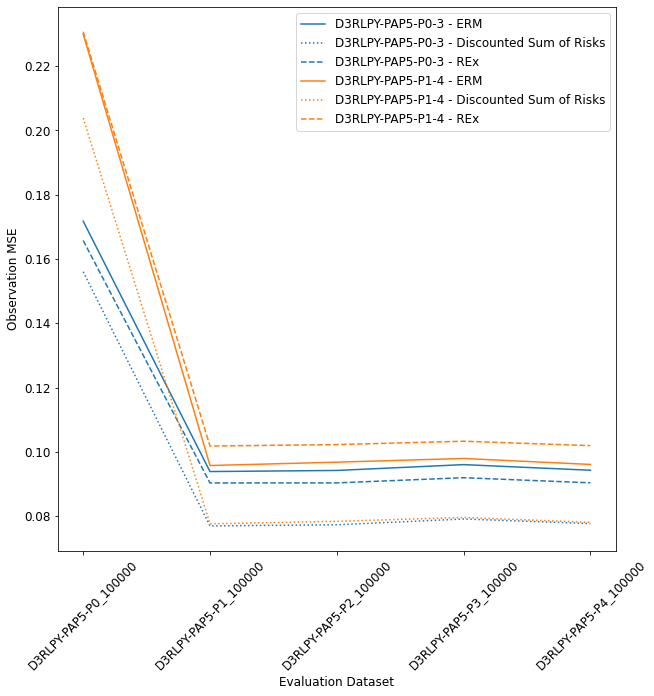

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'observation_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = [
    'D3RLPY-PAP5-P0_100000',
    'D3RLPY-PAP5-P1_100000',
    'D3RLPY-PAP5-P2_100000',
    'D3RLPY-PAP5-P3_100000',
    'D3RLPY-PAP5-P4_100000',
]
for i, t_ds in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), metric
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds} - {labels[j]}'
        p = ax.plot(evaluation_datasets, plot_mean, label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Observation MSE')
ax.legend()

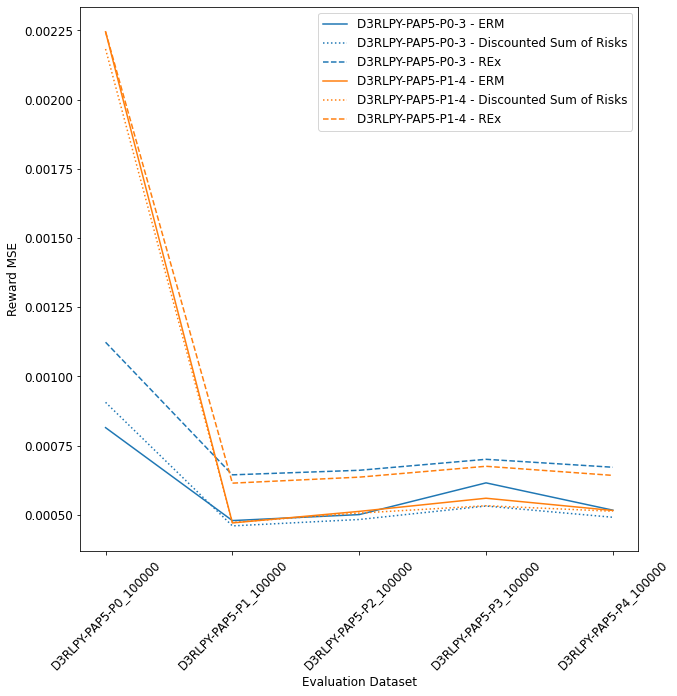

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Discounted Sum of Risks', 'REx']

metric = 'reward_mse'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = [
    'D3RLPY-PAP5-P0_100000',
    'D3RLPY-PAP5-P1_100000',
    'D3RLPY-PAP5-P2_100000',
    'D3RLPY-PAP5-P3_100000',
    'D3RLPY-PAP5-P4_100000',
]
for i, t_ds in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), metric
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds} - {labels[j]}'
        p = ax.plot(evaluation_datasets, plot_mean, label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.legend()

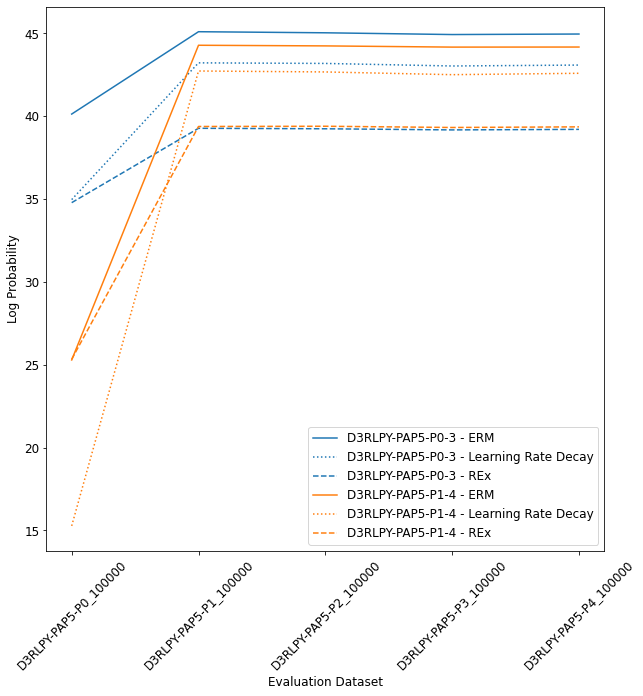

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

cols = [u'#1f77b4', u'#ff7f0e']
lss =  ['-', ':', '--']
labels = ['ERM', 'Learning Rate Decay', 'REx']

metric = 'log_prob'
training_datasets = ['D3RLPY-PAP5-P0-3', 'D3RLPY-PAP5-P1-4']
evaluation_datasets = [
    'D3RLPY-PAP5-P0_100000',
    'D3RLPY-PAP5-P1_100000',
    'D3RLPY-PAP5-P2_100000',
    'D3RLPY-PAP5-P3_100000',
    'D3RLPY-PAP5-P4_100000',
]
for i, t_ds in enumerate(training_datasets):
    for j, (rex, rex_beta) in enumerate([(False, 0.), (False, 10.), (True, 10.)]):
        mask = (
            (d3rlpy_pap5_scores_avgs_df['training_dataset'] == t_ds) &
            (d3rlpy_pap5_scores_avgs_df['rex'] == rex) &
            (d3rlpy_pap5_scores_avgs_df['rex_beta'] == rex_beta) &
            (d3rlpy_pap5_scores_avgs_df['evaluation_dataset'].isin(evaluation_datasets)), metric
        )
        plot_mean = d3rlpy_pap5_scores_avgs_df.loc[mask]
        label = f'{t_ds} - {labels[j]}'
        p = ax.plot(evaluation_datasets, plot_mean, label=label, ls=lss[j], c=cols[i])
ax.set_xticks(ax.get_xticks(), evaluation_datasets, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()